<a href="https://colab.research.google.com/github/cjsutton77/ML_toy_examples/blob/master/wine_quality_09112022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

In [2]:
X,y = load_wine(return_X_y=True,as_frame=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
sum(y_train == 0),sum(y_train == 1),sum(y_train == 2)
# check the balance of classes in the training targets

(39, 47, 33)

In [6]:
sum(y_test == 0),sum(y_test == 1),sum(y_test == 2)
# check the number of classes in the test targets

(20, 24, 15)

In [7]:
X_train.drop(['flavanoids','total_phenols'],axis=1,inplace=True)
X_test.drop(['flavanoids','total_phenols'],axis=1,inplace=True)

# looked ahead.. flavanoids and total_phenols are colinear.  I'll drop them.

In [8]:
import seaborn as sns

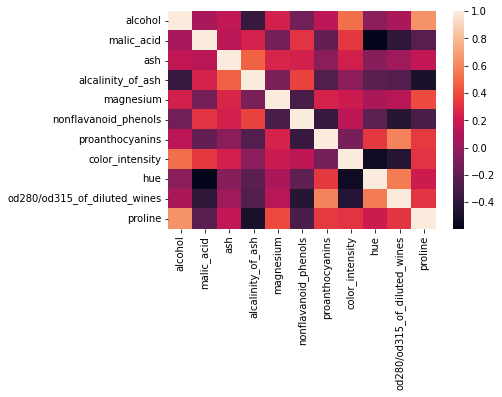

In [9]:
sns.heatmap(X_train.corr())
# let's get a measure of the correlation for each feature, for co-linearity

In [10]:
X_train.corr() > 0.8

# same thing, but I just want to mark high correlation with True, for co-linearity

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,True,False,False,False,False,False,False,False,False,False,False
malic_acid,False,True,False,False,False,False,False,False,False,False,False
ash,False,False,True,False,False,False,False,False,False,False,False
alcalinity_of_ash,False,False,False,True,False,False,False,False,False,False,False
magnesium,False,False,False,False,True,False,False,False,False,False,False
nonflavanoid_phenols,False,False,False,False,False,True,False,False,False,False,False
proanthocyanins,False,False,False,False,False,False,True,False,False,False,False
color_intensity,False,False,False,False,False,False,False,True,False,False,False
hue,False,False,False,False,False,False,False,False,True,False,False
od280/od315_of_diluted_wines,False,False,False,False,False,False,False,False,False,True,False


NameError: ignored

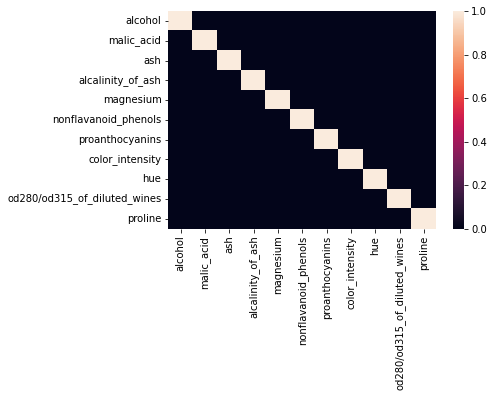

In [11]:
import seaborn as sns
sns.heatmap(X_train.corr() > 0.75)
plt.title('Features who\'s correlation is higher than 0.75')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
# got to scale for PCA

In [ ]:
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

In [ ]:
X_train_sc.shape

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)
# 11 features, knock down to 2

In [ ]:
pc = pca.transform(X_train_sc)
# get PC1, PC2 on scaled training data

In [ ]:
pc.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)
# ok..  is almost 60% of explained variance.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(pc[:,0],pc[:,1],c=y_train)
# plot the first and second PC's.. Look seperable.

In [ ]:
import numpy as np

In [ ]:
X_test_sc = np.array(X_test - scaler.mean_)/np.sqrt(scaler.var_)
# scale  test data with mean and std from the training.

In [ ]:
pc2 = pca.transform(np.array(X_test_sc))
# now project..

In [ ]:
plt.scatter(pc[:,0],pc[:,1],c=y_train,s=4)
plt.scatter(pc2[:,0],pc2[:,1],c=y_test,marker='*')
# plotted the training data as tiny dots, stars as test data.  Did a pretty decent job!  Note the PC's show seperability
# the three classes.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=42,penalty='l2')

In [ ]:
lr.fit(X_train_sc,y_train)

In [ ]:
y_lr_pred = lr.predict(X_test_sc)

In [ ]:
lr.score(X_test_sc,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_lr_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
plt.title(lr.score(X_test_sc,y_test))

In [ ]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(C=1,
                 kernel = 'rbf', 
                 random_state = 0, 
                 gamma = 0.2)
classifier.fit(X_train_sc, y_train)

In [ ]:
#Predicting the Test Set
y_pred = classifier.predict(X_test_sc)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
plt.title(classifier.score(X_test_sc,y_test))

In [ ]:
sum(y_pred == y_test)/len(y_pred)

In [ ]:
plt.scatter(pc[:,0],pc[:,1],c=y_train,s=4)
plt.scatter(pc2[:,0],pc2[:,1],c=y_test,marker='*')

In [ ]:
X_train_pc = np.array([pc[:,0],pc[:,1]]).T
X_train_pc.shape

In [ ]:
X_test_pc = np.array([pc2[:,0],pc2[:,1]]).T
X_test_pc.shape

In [ ]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier2 = SVC(C=1,
                 kernel = 'rbf', 
                 random_state = 0, 
                 gamma = 0.9)
classifier2.fit(X_train_pc, y_train)

In [ ]:
#Predicting the Test Set
y_pred = classifier2.predict(X_test_pc)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
plt.title(classifier2.score(X_test_pc,y_test))

In [ ]:
plt.scatter(X_test_pc[:,0],X_test_pc[:,1],c=y_pred,marker='*',alpha=1)
plt.scatter(X_test_pc[:,0],X_test_pc[:,1],c=y_test,marker='o',s=200,alpha=.2)

In [ ]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier3 = SVC(C=1,
                 kernel = 'rbf', 
                 random_state = 0, 
                 gamma = 0.1)
classifier3.fit(X_train, y_train)

In [ ]:
#Predicting the Test Set
y_pred = classifier3.predict(X_test)
classifier3.score(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
plt.title(classifier3.score(X_test,y_test))

In [ ]:
plt.scatter(X_test_pc[:,0],X_test_pc[:,1],c=y_pred,marker='*',s=200, alpha=1)
plt.scatter(X_test_pc[:,0],X_test_pc[:,1],c=y_test,marker='o',s=50,alpha=.2)